# Feature Engineering.

## Emergency-911 calls Dataset

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Aaditya\Downloads\911.csv')

In [3]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [5]:
data.nunique()

lat           20101
lng           20123
desc         289179
zip             125
title           131
timeStamp    279595
twp              68
addr          32005
e                 1
dtype: int64

In [6]:
data.describe()

,lat,lng,zip,e
count,289240.000000,289240.000000,253942.000000,289240.0
mean,40.159149,-75.316496,19235.103413,1.0
std,0.088823,0.160315,304.051163,0.0
min,30.333596,-95.595595,17555.000000,1.0
25%,40.099904,-75.392320,19038.000000,1.0
50%,40.144223,-75.304587,19401.000000,1.0
75%,40.229008,-75.211038,19446.000000,1.0
max,41.167156,-74.813670,77316.000000,1.0


In [7]:
data.isna().sum()

lat              0
lng              0
desc             0
zip          35298
title            0
timeStamp        0
twp            103
addr             0
e                0
dtype: int64

# Data Processing.

### We can  see that reason of calling 911 is having two part first is emergency category and second part is specific reason and both the parts are saperated by the colon ':'. So we can extract more knowladge from the title column.

In [8]:
data['broadReason'] = data['title'].apply(lambda x : x.split(':')[0])

In [9]:
data['broadReason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: broadReason, dtype: int64

In [10]:
data['specificReason'] = data['title'].apply(lambda x : x.split(':')[1])

In [11]:
data['specificReason'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE -',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' VEH

In [12]:
data['specificReason'].nunique()

89

## For further data processing we need 'datetime' library 

### importing datetime library 

In [13]:
from datetime import datetime

### Firstly the timestamp column is in string format, so we have to convert it into datetime format.

In [14]:
data['timeStamp'] = data['timeStamp'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

### Now we can extract DayOfWeek, Month and Year timestamp column. 

In [15]:
data['dayOfWeek'] = data['timeStamp'].dt.dayofweek

In [16]:
data['dayOfWeek'] = data['dayOfWeek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [17]:
data['month'] = data['timeStamp'].dt.month

In [18]:
data['month'] = data['month'].map({1:'Jan',
                                   2:'Feb',
                                   3:'Mar',
                                   4:'Apr',
                                   5:'May',
                                   6:'Jun',
                                   7:'Jul',
                                   8:'Aug',
                                   9:'Sep',
                                   10:'Oct',
                                   11:'Nov',
                                   12:'Dec'})

In [19]:
data['year'] = data['timeStamp'].dt.year

In [20]:
data['year'].unique()

array([2015, 2016, 2017], dtype=int64)

### Now we are going to extract time from timestamp column. 

In [21]:
data['time'] = data['timeStamp'].dt.time

In [22]:
data['time']

0         17:10:52
1         17:29:21
2         14:39:21
3         16:47:36
4         16:56:52
            ...   
289235    11:11:36
289236    11:11:30
289237    11:15:24
289238    11:12:03
289239    11:14:31
Name: time, Length: 289240, dtype: object

### We are dropping column named 'e' because it is having only value '1', Rightnow it is of no use for us.

In [23]:
data['e'].unique()

array([1], dtype=int64)

In [24]:
data.drop('e',axis=1,inplace=True)

# Data Visualization and Data Analysis.

## 1. Categories for calls.

<AxesSubplot:xlabel='broadReason', ylabel='count'>

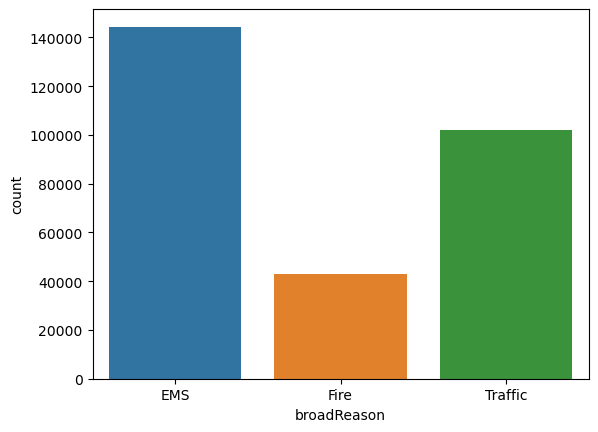

In [25]:
sns.countplot(data=data,x='broadReason')

Text(0, 0.5, '')

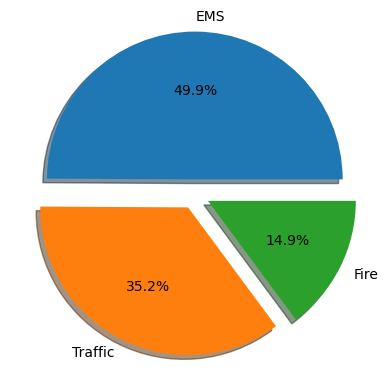

In [26]:
data['broadReason'].value_counts().plot(kind='pie',explode=[.1,.1,.1],autopct='%1.1f%%',shadow=True)
plt.ylabel('')

#### Conclution: Most of the calls are made for reason EMS its almost 50%.

## 2. Top 5 specific reason for calls.

Text(0, 0.5, '')

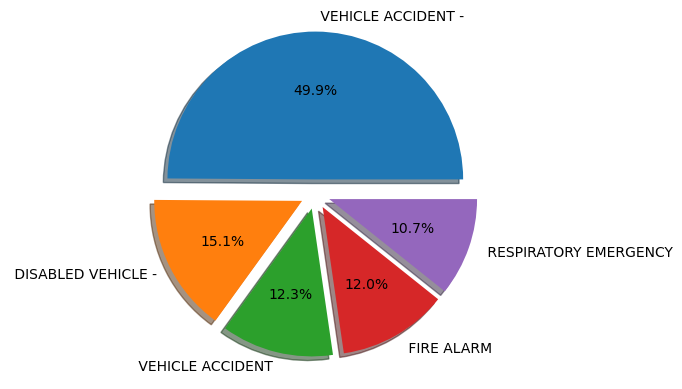

In [27]:
data['specificReason'].value_counts().head().plot(kind='pie',explode=[.1,.1,.1,.1,.1],autopct='%1.1f%%',shadow=True)
plt.ylabel('')

#### Conclution: The specific reason to call 911 is Vehicle Accident.

## 3. Top 5 zip code called 911.

Text(0, 0.5, 'No. of calls')

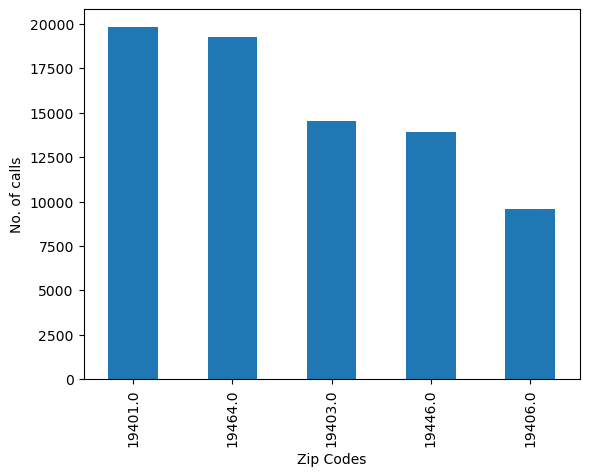

In [28]:
data['zip'].value_counts().head().plot(kind='bar')
plt.xlabel('Zip Codes')
plt.ylabel('No. of calls')

Text(0, 0.5, '')

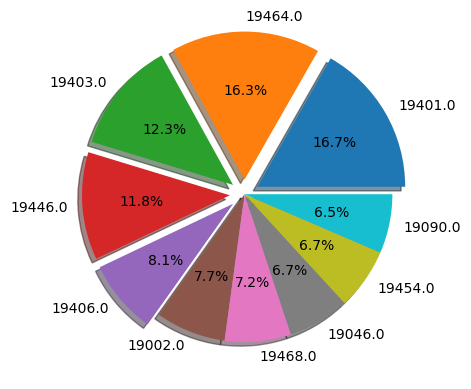

In [29]:
data['zip'].value_counts().head(10).plot(kind='pie',explode=[.1,.1,.1,.1,.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.ylabel('')

#### Conclution: Zip codes 19401, 19464, 19403, 19446 and 19406 are more aware of call 911.

## 4. Top 5 township called  911.

<AxesSubplot:>

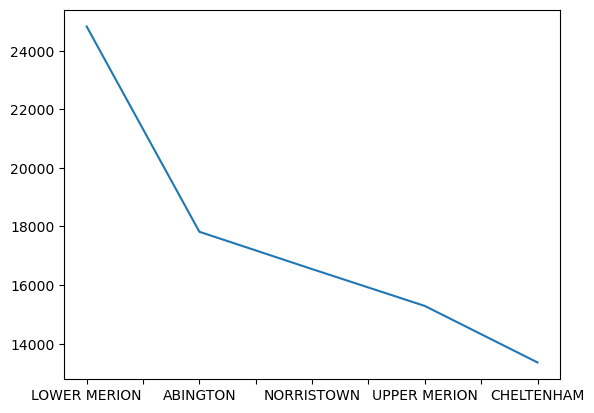

In [30]:
data['twp'].value_counts().head().plot(kind='line')

Text(0, 0.5, '')

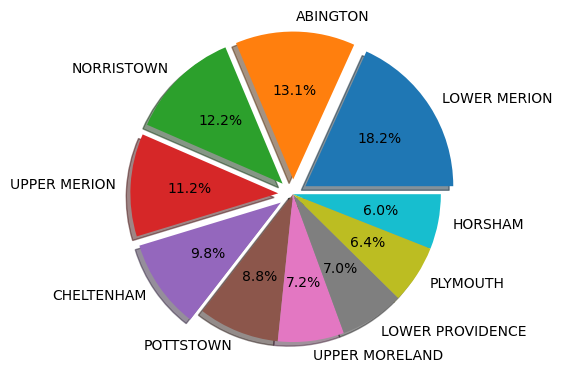

In [31]:
data['twp'].value_counts().head(10).plot(kind='pie',explode=[.1,.1,.1,.1,.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.ylabel('')

#### Conclution: Townships LOWER MERION (18.2%), ABINGTON (13.1%), NORRISTOWN (12.2%), UPPER MERION (11.2%) AND CHELTENHAM (9.8%)  are the townships where most of the accident happend.

## 5. Week day on which the emergencies are maximum.

[Text(0.5, 0, 'Days Of Week'), Text(0, 0.5, 'No. of calls')]

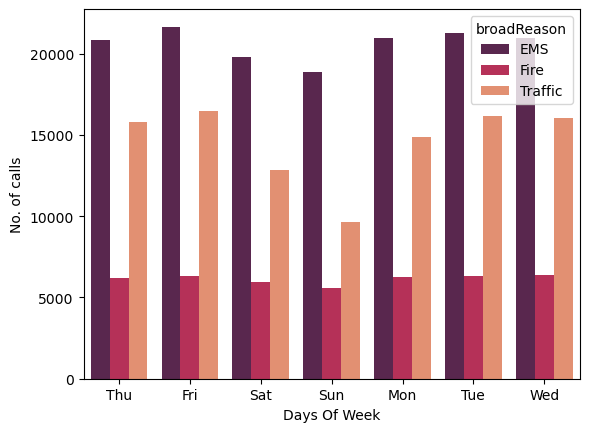

In [32]:
grahp = sns.countplot(data=data,x='dayOfWeek',palette="rocket",hue='broadReason')
grahp.set(xlabel='Days Of Week',ylabel='No. of calls')

#### Conclution: Except Sunday there are  almost same number of emergencies. There is little bit less number cases on sundays. 

## 6. Month in which more calls were made.

[Text(0.5, 24.0, 'Month'), Text(24.0, 0.5, 'No. of calls')]

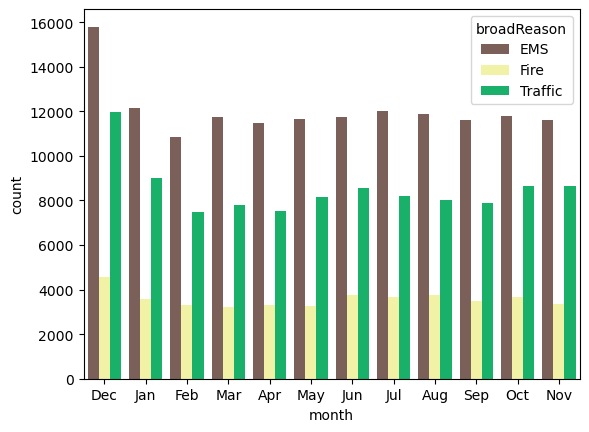

In [33]:
graph = sns.countplot(data=data,x='month',hue='broadReason',palette='terrain_r')
grahp.set(xlabel='Month',ylabel='No. of calls')

#### Conclution: In the month of December there is maximum number of cases with compare to other months, remaining all months have almost same number of cases. 

## 7. Maximum no. of call are in which year.

[Text(0.5, 24.0, 'Year'), Text(24.0, 0.5, 'No. of calls')]

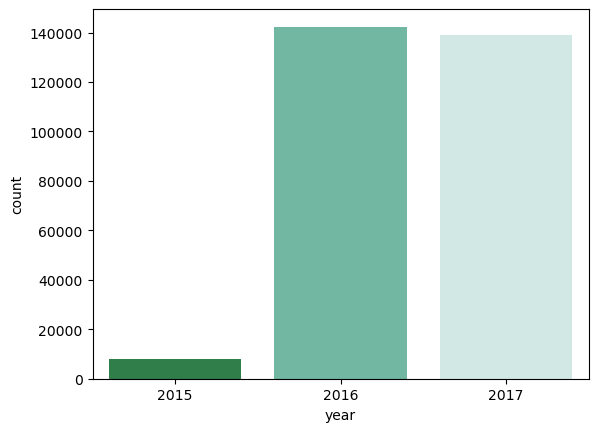

In [34]:
graph = sns.countplot(data=data,x='year',palette="BuGn_r")
grahp.set(xlabel='Year',ylabel='No. of calls')

#### Conclution: In the above graph we can see that there is almost same number of calls in both years 2016 and 2017. But in 2015 there is data lost or there service is started thats why we are not having complete data of year 2015. 